# Gene Expression Analysis

In [ ]:
from google.colab import drive
drive.mount('/MultiClusterGAN')
%cd /MultiClusterGAN/MyDrive/CNS/
%pip install  umap-learn scanpy

Mounted at /MultiClusterGAN
/MultiClusterGAN/MyDrive/CNS
     |████████████████████████████████| 86 kB 2.7 MB/s 
     |████████████████████████████████| 2.0 MB 28.3 MB/s 
     |████████████████████████████████| 1.1 MB 26.8 MB/s 
     |████████████████████████████████| 91 kB 6.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=fd95682f804908859910212c635ad2a8b793a53a3bd8e6fdffc6572b4f45be8d
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=610d056e4330ea35885d164cd08c759cfcc6dd9f7421ac954a13deb1caa13715
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=fbe954bb5fd45ab78d5d5c44c3b6a35c087e7794fdd52

In [ ]:
# Loading the Packages

%reload_ext autoreload
%autoreload 2

import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

from tifffile import tifffile
from scipy import ndimage

# from starmap.obj import STARMapDataset, load_data
# import starmap.analyze as anz
# import starmap.viz as viz
# import starmap.sc_util as su
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
from anndata import AnnData

In [ ]:
# Colormap related
import colorsys
from random import shuffle

def intervals(parts, start_point, end_point):
    duration = end_point - start_point
    part_duration = duration / parts
    return [((i * part_duration + (i + 1) * part_duration)/2) + start_point for i in range(parts)]

## Input

In [ ]:
coronals = [
    'spinalcord',
    'well01brain',
    'well01OB',
    'well03',
    'well04',
    'well05',
    'well06',
    'well07',
    'well08',
    'well09',
    'well10',
    'well11',
    'well1_5',
    'well2_5',
    'well3_5',
    'well7_5',
    'well10_5',
    'sagittal1',
    'sagittal2',
    'sagittal3'
]

In [ ]:
cell_meta_data_concatenated=pd.read_csv('cell_meta_data_concatenated_tissue.csv')

In [ ]:
from pathlib import Path


In [ ]:
adata1=sc.read_h5ad('adata1_with_tissue_label.h5ad')


In [ ]:
cell_meta_data_concatenated.groupby(['tissue_id', 'anatomical_region_label']).size().unstack(fill_value=0).to_csv('output_data/numbers/all_samples_tissue_label_num.csv')

In [ ]:
cell_meta_data_concatenated.groupby(['tissue_id', 'Rank4_Refine']).size().unstack(fill_value=0).to_csv('output_data/numbers/all_samples_Rank4_Refine_num.csv')

In [ ]:
cell_meta_data_concatenated.groupby(['tissue_id', 'Rank5_Symbol']).size().unstack(fill_value=0).to_csv('output_data/numbers/all_samples_Rank5_Symbol_num.csv')

In [ ]:
from tqdm import tqdm
for i in tqdm(coronals):
  Path("output_data/numbers/"+i).mkdir(parents=True, exist_ok=True)

  well_i=cell_meta_data_concatenated.loc[cell_meta_data_concatenated['sample']==i,:]
  well_i.groupby(['tissue_id', 'anatomical_region_label']).size().unstack(fill_value=0).to_csv('output_data/numbers/'+i+'/tissue_label_num.csv')
  well_i.groupby(['tissue_id', 'anatomical_parent_region_label']).size().unstack(fill_value=0).to_csv('output_data/numbers/'+i+'/tissue_label_num_parent.csv')


100%|██████████| 20/20 [00:04<00:00,  4.67it/s]


100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


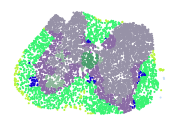

In [ ]:
np.random.seed(0) 
cmap=np.random.rand(100,3)


for i in tqdm(coronals[:1]):
  Path("output_data/figures/"+i).mkdir(parents=True, exist_ok=True)

  well_i=cell_meta_data_concatenated.loc[cell_meta_data_concatenated['sample']==i,:]
  test=well_i.groupby(['tissue_id', 'anatomical_region_label']).size().unstack(fill_value=0)
  


  plt.figure(figsize=(int(max(well_i['row']))/4000,int(max(well_i['col']))/4000))
  plt.scatter(max(well_i['row'])-well_i['row'],well_i['col'],
            c=cmap[[int(x) for x in well_i['tissue_id']]],s=1)
  plt.axis('off')
  plt.savefig('output_data/figures/'+i+'/all.png',dpi=300)


  for j in test.index:
    plt.figure(figsize=(int(max(well_i['row']))/4000,int(max(well_i['col']))/4000))
    plt.scatter(max(well_i['row'])-well_i['row'],well_i['col'],
              color=[0.9,0.9,0.9],s=1)

    well_i_j=well_i.loc[well_i['tissue_id']==j,:]


    plt.scatter(max(well_i['row'])-well_i_j['row'],well_i_j['col'],
              color=cmap[int(j)],s=1)
    plt.axis('off')
    plt.savefig('output_data/figures/'+i+'/'+str(j)+'.png',dpi=300)


In [ ]:
np.random.seed(0) 
cmap=np.random.rand(100,3)


for i in tqdm(coronals[2:]):
  Path("output_data/figures/"+i).mkdir(parents=True, exist_ok=True)

  well_i=cell_meta_data_concatenated.loc[cell_meta_data_concatenated['sample']==i,:]
  test=well_i.groupby(['tissue_id', 'anatomical_region_label']).size().unstack(fill_value=0)
  


  plt.figure(figsize=(int(max(well_i['row']))/4000,int(max(well_i['col']))/4000))
  plt.scatter(max(well_i['row'])-well_i['row'],well_i['col'],
            c=cmap[[int(x) for x in well_i['tissue_id']]],s=1)
  plt.axis('off')
  plt.savefig('output_data/figures/'+i+'/all.png',dpi=300)


  for j in test.index:
    plt.figure(figsize=(int(max(well_i['row']))/4000,int(max(well_i['col']))/4000))
    plt.scatter(max(well_i['row'])-well_i['row'],well_i['col'],
              color=[0.9,0.9,0.9],s=1)

    well_i_j=well_i.loc[well_i['tissue_id']==j,:]


    plt.scatter(max(well_i['row'])-well_i_j['row'],well_i_j['col'],
              color=cmap[int(j)],s=1)
    plt.axis('off')
    plt.savefig('output_data/figures/'+str(j)+'.png',dpi=300)
  break

In [ ]:
i

'spinalcord'

In [ ]:
from tqdm import tqdm
for i in tqdm(coronals):
  Path("output_data/numbers/"+i).mkdir(parents=True, exist_ok=True)

  well_i=cell_meta_data_concatenated.loc[cell_meta_data_concatenated['sample']==i,:]
  well_i.groupby(['tissue_id', 'Rank4_Refine']).size().unstack(fill_value=0).to_csv('output_data/numbers/'+i+'/rank4_num.csv')
  well_i.groupby(['tissue_id', 'Rank5_Symbol']).size().unstack(fill_value=0).to_csv('output_data/numbers/'+i+'/rank5_num.csv')
  

100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
